In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib

matplotlib.rcParams["font.family"] = "Malgun Gothic"

In [ ]:
df = pd.read_csv("../data/실습데이터.csv")
df

In [ ]:
df[df["실거래금액"]<0]

In [4]:
# 전처리 1 : 그룹화 위한 쿠폰사용여부 컬럼 생성
df["쿠폰사용여부"] = df["쿠폰할인액"].apply(lambda x: "쿠폰 사용" if x != "-" else "쿠폰 미사용")
df["쿠폰사용여부"]

0         쿠폰 미사용
1         쿠폰 미사용
2         쿠폰 미사용
3          쿠폰 사용
4         쿠폰 미사용
           ...  
159323     쿠폰 사용
159324    쿠폰 미사용
159325     쿠폰 사용
159326    쿠폰 미사용
159327    쿠폰 미사용
Name: 쿠폰사용여부, Length: 159328, dtype: object

In [ ]:
df_payment = df[df["유형"]=="PAYMENT"]
df_payment

In [6]:
# 쿠폰 사용 미사용 거래와 쿠폰 사용거래 비율이 거의 반반
temp1 = df_payment.groupby("쿠폰사용여부")["실거래금액"].count()
temp1

쿠폰사용여부
쿠폰 미사용    71628
쿠폰 사용     76382
Name: 실거래금액, dtype: int64

Text(0.5, 1.0, '쿠폰 사용 여부에 따른 거래건수')

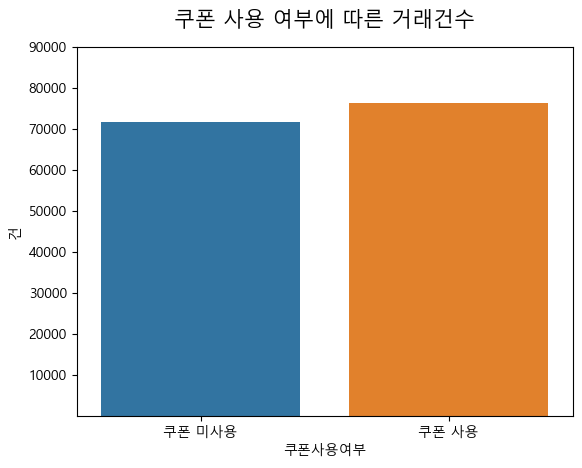

In [13]:
# 쿠폰 사용 미사용 비율 그래프
sns.barplot(x=temp1.index, y=temp1.values)
plt.yticks(np.arange(10000, 100000, 10000))
plt.ylabel("건")
plt.title('쿠폰 사용 여부에 따른 거래건수', fontsize = 15, pad=15) # 타이틀

Text(0.5, 1.0, '전체 거래중 쿠폰 사용 거래 비율')

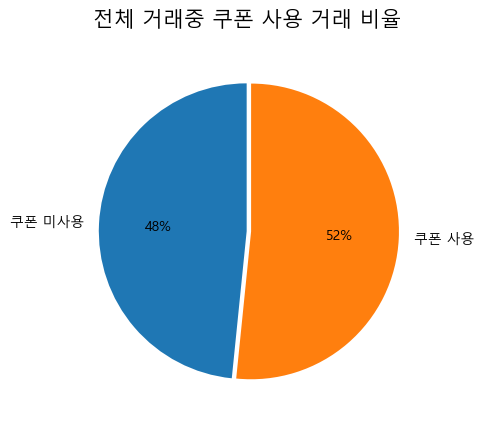

In [7]:
plt.pie(x=temp1.values, labels = temp1.index, autopct='%.0f%%', startangle=90, explode = [0, 0.03])
plt.title('전체 거래중 쿠폰 사용 거래 비율', fontsize = 15, pad=15) # 타이틀

In [8]:
# 쿠폰 미사용 134억
# 쿠폰 사용    91억
temp2 = df_payment.groupby("쿠폰사용여부")["실거래금액"].sum()
temp2

쿠폰사용여부
쿠폰 미사용    15705934824
쿠폰 사용      9147703454
Name: 실거래금액, dtype: int64

Text(0.5, 1.0, '쿠폰 사용 여부에 따른 거래금액')

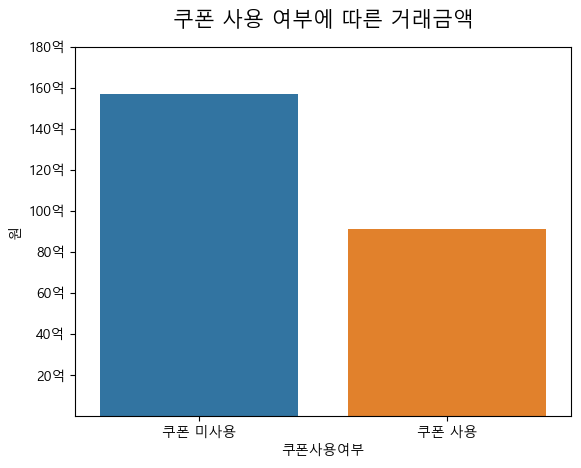

In [9]:
# 쿠폰 사용 미사용 판매 금액 그래프
sns.barplot(x=temp2.index, y=temp2.values)
plt.yticks(np.arange(2000000000, 20000000000, 2000000000), labels=[f"{i*20}억" for i in range(1,10)])
plt.ylabel("원")
plt.title('쿠폰 사용 여부에 따른 거래금액', fontsize = 15, pad=15) # 타이틀

In [19]:
# 쿠폰 할인 미적용 판매가격 합계
temp3 = df_payment.groupby("쿠폰사용여부")["판매가격"].sum()
temp3

쿠폰사용여부
쿠폰 미사용    15708585713
쿠폰 사용     16526075970
Name: 판매가격, dtype: int64

Text(0.5, 1.0, '쿠폰 사용 여부에 따른 판매금액(할인 적용 X)')

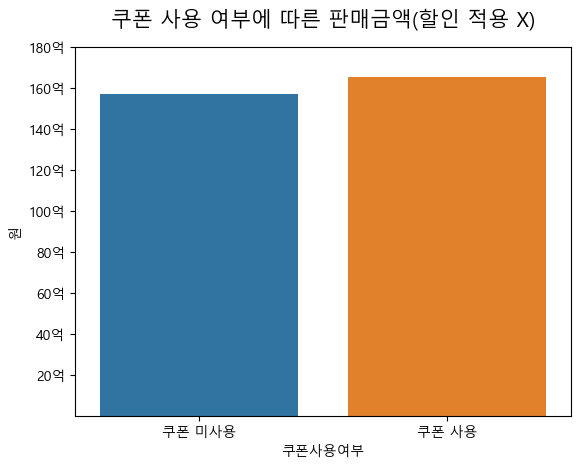

In [20]:
sns.barplot(x=temp3.index, y=temp3.values)
plt.yticks(np.arange(2000000000, 20000000000, 2000000000), labels=[f"{i*20}억" for i in range(1,10)])
plt.ylabel("원")
plt.title('쿠폰 사용 여부에 따른 판매금액(할인 적용 X)', fontsize = 15, pad=15) # 타이틀

In [21]:
# 잠정결론 : 쿠폰 사용거래가 전체거래의 절반 정도되고 
#                          전체 판매금액의 절반 정도를 차지함

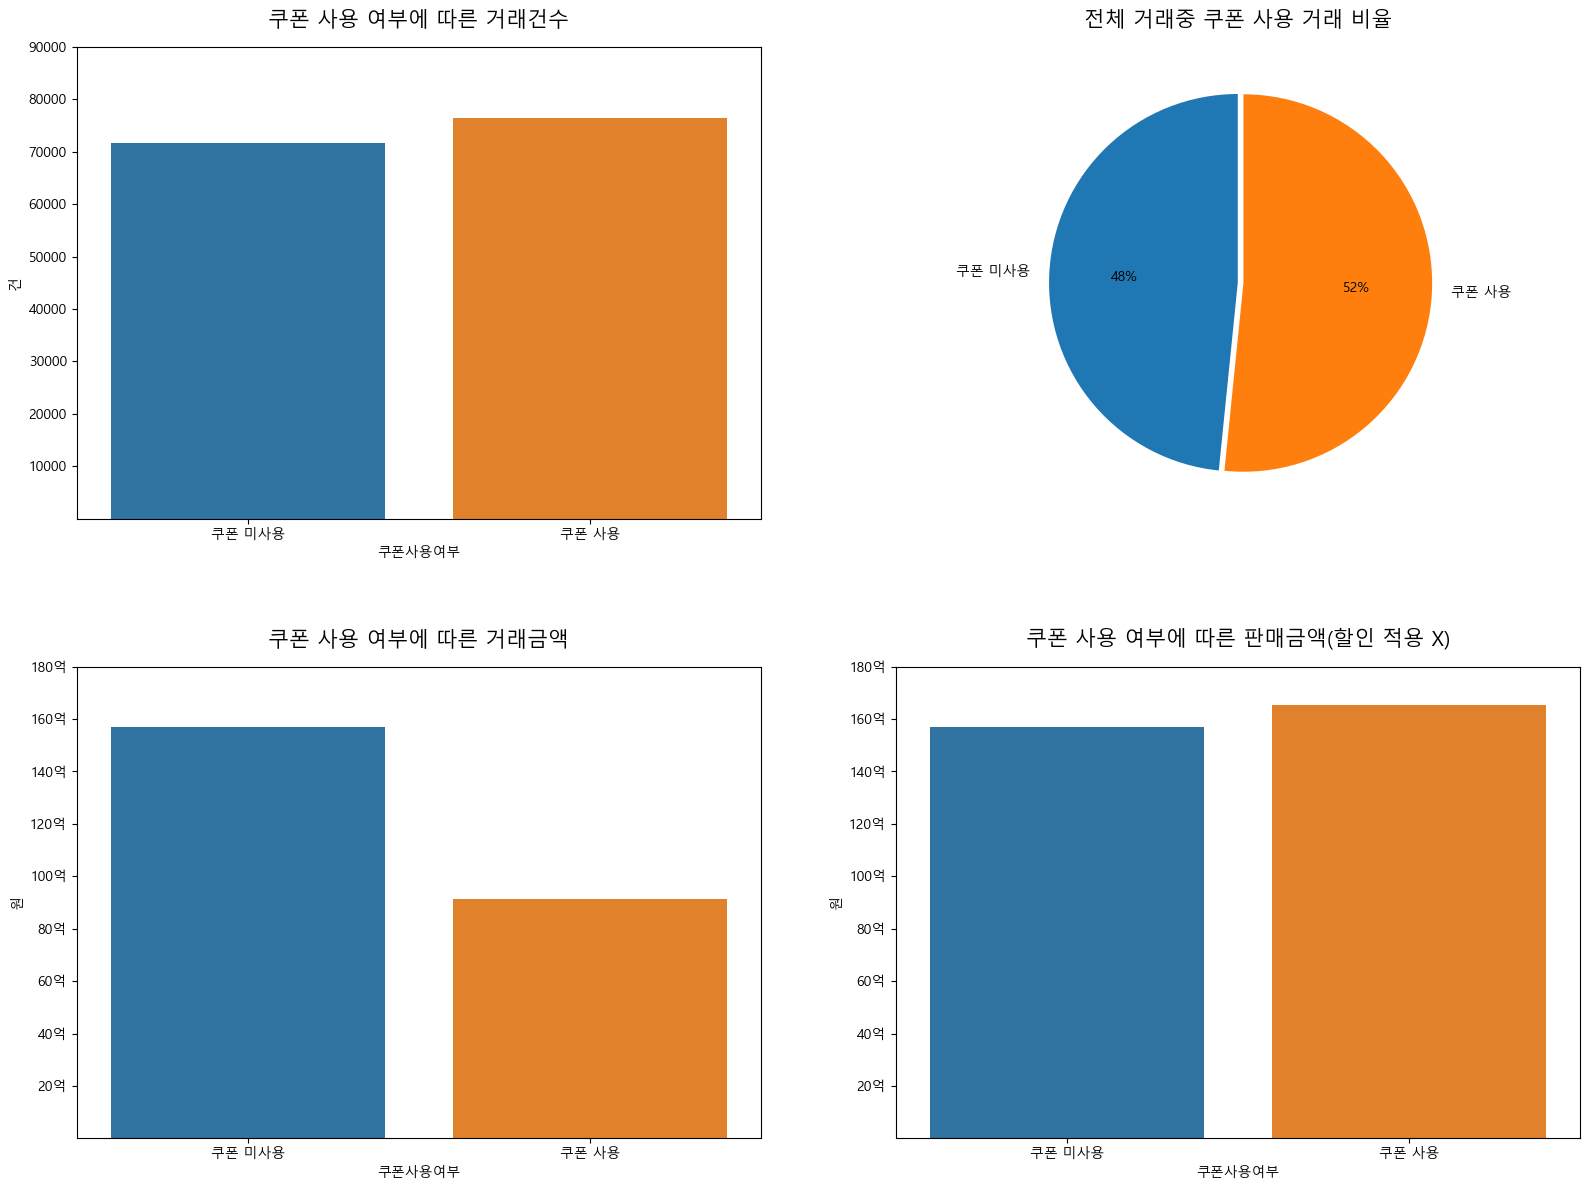

In [37]:
# 그래프 한 번에 그리기
plt.figure(figsize=(16, 12)) # figure 사이즈 설정


# 쿠폰 사용 미사용 비율 그래프
plt.subplot(2, 2, 1)
sns.barplot(x=temp1.index, y=temp1.values)
plt.yticks(np.arange(10000, 100000, 10000))
plt.ylabel("건")
plt.title('쿠폰 사용 여부에 따른 거래건수', fontsize = 15, pad=15) # 타이틀

plt.subplot(2, 2, 2)
plt.pie(x=temp1.values, labels = temp1.index, autopct='%.0f%%', startangle=90, explode = [0, 0.03])
plt.title('전체 거래중 쿠폰 사용 거래 비율', fontsize = 15, pad=15) # 타이틀


# 쿠폰 사용 미사용 판매 금액 그래프
plt.subplot(2, 2, 3)
sns.barplot(x=temp2.index, y=temp2.values)
plt.yticks(np.arange(2000000000, 20000000000, 2000000000), labels=[f"{i*20}억" for i in range(1,10)])
plt.ylabel("원")
plt.title('쿠폰 사용 여부에 따른 거래금액', fontsize = 15, pad=15) # 타이틀

plt.subplot(2, 2, 4)
sns.barplot(x=temp3.index, y=temp3.values)
plt.yticks(np.arange(2000000000, 20000000000, 2000000000), labels=[f"{i*20}억" for i in range(1,10)])
plt.ylabel("원")
plt.title('쿠폰 사용 여부에 따른 판매금액(할인 적용 X)', fontsize = 15, pad=15) # 타이틀

plt.tight_layout(h_pad=5, w_pad=5)